# Data analysis for FA simulation

In [1]:
using Plots, JLD, SpecialFunctions, LaTeXStrings

In [2]:
results = load("FAfront.jld")

Dict{String,Any} with 5 entries:
  "T=100000,L=10000,H=200,cores=16" => Dict{String,Any}(Pair{String,Any}("2018-…
  "T=1000,L=1000,H=100,cores=16"    => Dict{String,Any}(Pair{String,Any}("2018-…
  "T=100,L=100,H=50,cores=16"       => Dict{String,Any}(Pair{String,Any}("2018-…
  "T=100000,L=1000,H=100,cores=16"  => Dict{String,Any}(Pair{String,Any}("2018-…
  "T=100,L=100,H=100,cores=16"      => Dict{String,Any}(Pair{String,Any}("2018-…

In [3]:
front = results["T=100000,L=10000,H=200,cores=16"]["2018-05-20T18:46:51.294"]["front"]
roughness = results["T=100000,L=10000,H=200,cores=16"]["2018-05-20T18:46:51.294"]["roughness"];

## Growth exponent

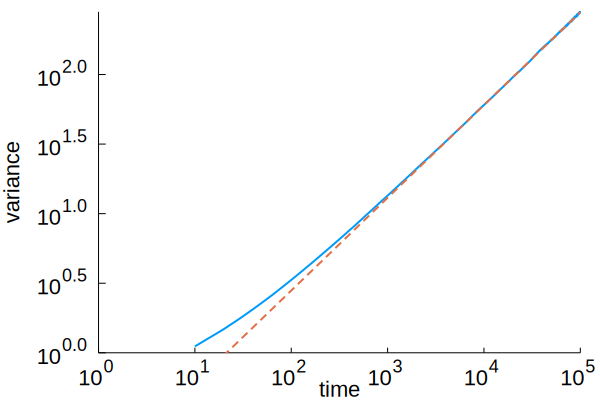

In [4]:
plot(10:10:100000, [roughness,0.13*collect(10:10:100000).^(2/3)], xaxis=(:log10, (1,Inf), "time", font(15)), yaxis=(:log10, (1,Inf), "variance", font(15)),
legend=:left, grid=:off, label="", linestyle=[:solid :dash], linewidth=2)

In [5]:
savefig("growth-exponent.png")

## Front distribution

In [6]:
front_ave = squeeze(sum(front,1),1)/10000;

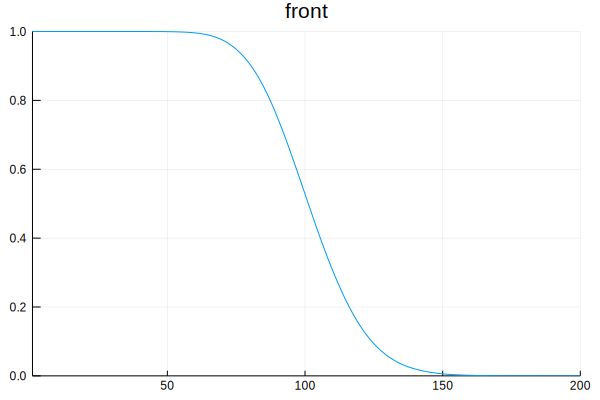

In [7]:
plot(front_ave, title="front",label="")

Let's try and compare this with the appropriate Tracy--Widom distribution

In [62]:
using TracyWidom, LsqFit

Model as a TW distribution with a shift and width (Note one has to get it the right way around because of the skew)

In [9]:
TW_model(s, params) = 1-F1((s-params[1])/params[2])

TW_model (generic function with 1 method)

In [10]:
TW_fit = curve_fit(TW_model, 1:200, front_ave, [120.1,15.1]);

Now we compare with a Gaussian model

In [11]:
Gaussian_model(s, params) = erfc.((s-params[1])/params[2]) / 2

Gaussian_model (generic function with 1 method)

In [12]:
Gaussian_fit = curve_fit(Gaussian_model, 1:200, front_ave, [100.1,15.1]);

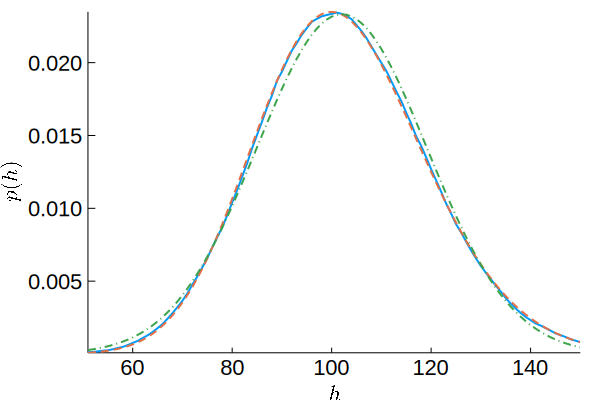

In [25]:
plot(51:150, 
    -[diff(front_ave[50:150]),diff(TW_model(50:150, TW_fit.param)), diff(Gaussian_model(50:150, Gaussian_fit.param))],
    xaxis=(L"h", font(15)), yaxis=(L"p(h)", font(15)),
    grid=:off, label="", linestyle=[:solid :dash :dashdot], linewidth=2)

In [154]:
savefig("TW-compare.png")

Let's see if the tail behaviour agrees with the TW behaviour

$$
  \log P(h) \propto \begin{cases}
  - h^3 & h\to -\infty\\
  -h^{3/2} & h\to +\infty
\end{cases}
$$

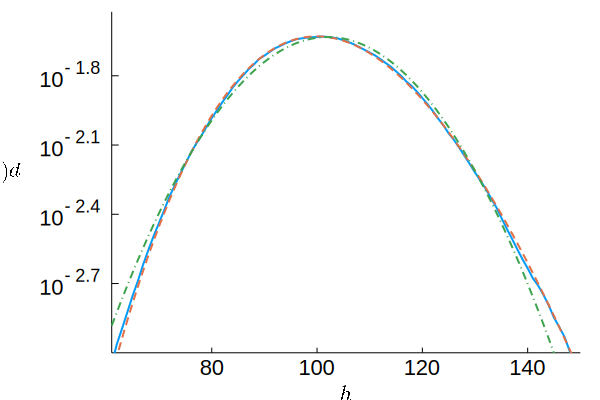

In [60]:
plot(61:150, -[diff(front_ave[60:150]),diff(TW_model(60:150, TW_fit.param)),diff(Gaussian_model(60:150, Gaussian_fit.param))],
    xaxis=(L"h", font(15)), yaxis=(:log10, (0.001, 0.03), L"p(h)", font(15)),
    grid=:off, label="", linestyle=[:solid :dash :dashdot], linewidth=2)

In [61]:
savefig("TW-compare-log.png")